In [101]:
import numpy as np
import matplotlib.pyplot as plt
import csv

data_files = ['asp', 'bsp', 'ssp,s=3', 'ssp,s=4', 'ssp,s=5', 'ssp,s=6', 'ssp,s=7']

In [102]:
data = {}

for file in data_files:
    acc, time = [], []
    with open(f'{file}.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            if row[0] != '99':
                acc.append(float(row[2]))
                time.append(float(row[3]))
    data[file] = np.array(acc), np.array(time)

# print(data)

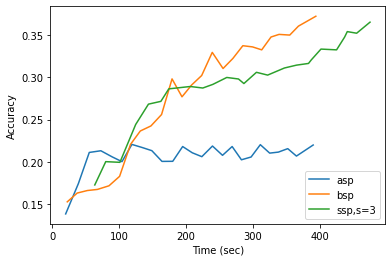

In [103]:
for series in data:
    if series in ['bsp', 'asp', 'ssp,s=3']:
        acc, time = data[series]
        plt.plot(time, acc, label=series)

plt.xlabel("Time (sec)")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.savefig('abs.png', dpi=300)
plt.show()

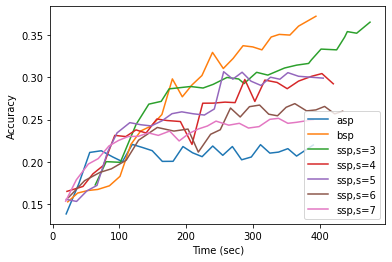

In [104]:
for series in data:
    acc, time = data[series]
    plt.plot(time, acc, label=series)

plt.xlabel('Time (sec)')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.savefig('aall.png', dpi=300)
plt.show()